# Hashtag Analysis

## Importing Packages

In [1]:
import tweepy
import configparser
import pandas as pd
import translators as ts

Using state Tamil Nadu server backend.


## Initial Configurations

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

In [4]:
auth = tweepy.OAuth2AppHandler(
    api_key ,
    api_key_secret
)
api = tweepy.API(auth)

## Fetching Data

In [10]:
keywords = '#HarGharTiranga'
limit=30000

In [11]:
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode='extended').items(limit)

In [12]:
tweets

In [13]:
columns = ['UserID', 'Name', 'Tweet', 'Mentions','Created At','Retweet', 'Likes','Location', 'Translated']
data = []

In [ ]:
for tweet in tweets:
    #print(tweet._json)
    tweet_mentions=[]
    a=tweet.entities
    data.append([tweet.user.screen_name, tweet.user.name, tweet.full_text, tweet.entities, tweet.created_at, None, tweet.favorite_count, tweet.user._json["location"],None])

In [28]:
df = pd.DataFrame(data, columns=columns)
df.head(3)

,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location,Translated
0,KartikDabas7,greatest every,RT @ArtSivasri: Received this picture. This is...,"{'hashtags': [{'text': 'HarGharTiranga', 'indi...",2022-09-02 19:18:03+00:00,None,0,India,None
1,KartikDabas7,greatest every,RT @ArtSivasri: Vande Mataram! Swatantradina n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2022-09-02 19:17:50+00:00,None,0,India,None
2,skkarthikbjp,Karthikeyan Selvakumar,RT @TNbjpmeenaakshi: #HarGharTirangaCampaign \...,{'hashtags': [{'text': 'HarGharTirangaCampaign...,2022-09-02 19:17:19+00:00,None,0,"Tamil Nadu, India",None


In [ ]:
#data

## Extracting User Mentions and Retweet Status

In [31]:
for i in range(len(data)):
    
    #extracting mentions
    
    tempMention=[data[i][3]['user_mentions'][j]['name'] for j in range(len(data[i][3]['user_mentions']))]
    #print(tempMention)
    data[i][3]=tempMention
    
    #extracting retweet status and updating tweet content
    tempTxt=data[i][2][:2]
    if tempTxt=="RT":
        data[i][5]=1
        data[i][2]=data[i][2][3:]
    else:
        data[i][5]=0
        

TypeError: sequence item 1: expected str instance, NoneType found

In [27]:
df = pd.DataFrame(data, columns=columns)
df

,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location,Translated
0,KartikDabas7,greatest every,RT @ArtSivasri: Received this picture. This is...,"{'hashtags': [{'text': 'HarGharTiranga', 'indi...",2022-09-02 19:18:03+00:00,None,0,India,None
1,KartikDabas7,greatest every,RT @ArtSivasri: Vande Mataram! Swatantradina n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2022-09-02 19:17:50+00:00,None,0,India,None
2,skkarthikbjp,Karthikeyan Selvakumar,RT @TNbjpmeenaakshi: #HarGharTirangaCampaign \...,{'hashtags': [{'text': 'HarGharTirangaCampaign...,2022-09-02 19:17:19+00:00,None,0,"Tamil Nadu, India",None
3,RahulVanpully,Rahul,RT @ArtSivasri: Vande Mataram! Swatantradina n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2022-09-02 19:16:49+00:00,None,0,India,None
4,Nitin1Jain,Namo Nitin Bafna,RT @narendramodi: Azadi Ka Amrit Mahotsav has ...,"{'hashtags': [{'text': 'HarGharTiranga', 'indi...",2022-09-02 19:15:30+00:00,None,0,India,None
...,...,...,...,...,...,...,...,...,...
35952,Nagaman71001491,Nagamani,RT @mla_sudhakar: ತಮ್ಮ ಉಸಿರು ಉಸಿರಿನಲ್ಲೂ ಸ್ವಾತಂ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2022-08-24 15:42:49+00:00,None,0,,None
35953,leaderpspk02,Shankar,RT @PawanKalyan: In every ‘JanaSena’ meeting w...,"{'hashtags': [{'text': 'HarGharTiranga', 'indi...",2022-08-24 15:36:20+00:00,None,0,,None
35954,MDSakib55679963,MD Sakib,RT @Harsimrankang0: #KashmirMainHarGharTiranga...,{'hashtags': [{'text': 'KashmirMainHarGharTira...,2022-08-24 15:25:58+00:00,None,0,,None
35955,somra_hansda834,🔰✝️SØMRĀ HÅÑSDĀ✝️🔰,RT @NSeraikella: Independence Day alongwith #H...,"{'hashtags': [{'text': 'HarGharTiranga', 'indi...",2022-08-24 15:15:01+00:00,None,0,"Chandil, India",None


In [14]:
df.to_csv('twitter_data.csv')

## Importing the CSV

In [2]:
tweet_df=pd.read_csv('twitter_data.csv')

In [3]:
tweet_df["UserID"].value_counts()

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
                   ... 
sandeep30766558       1
Aaaaaaa48043398       1
onlyiffat             1
rpfpchgyd             1
BharatPhonde5         1
Name: UserID, Length: 12253, dtype: int64

In [4]:
tweet_df["Retweet"].value_counts()

1    33680
0     2267
Name: Retweet, dtype: int64

## Visualizing data

In [5]:
topUsers=tweet_df["UserID"].value_counts()[:10]
topUsers

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
RahulVerma1971      504
nyks_doda           488
therkmalviya        473
nykkinnaur          399
JammuNehru          363
Name: UserID, dtype: int64

In [6]:
import matplotlib.pyplot as plt

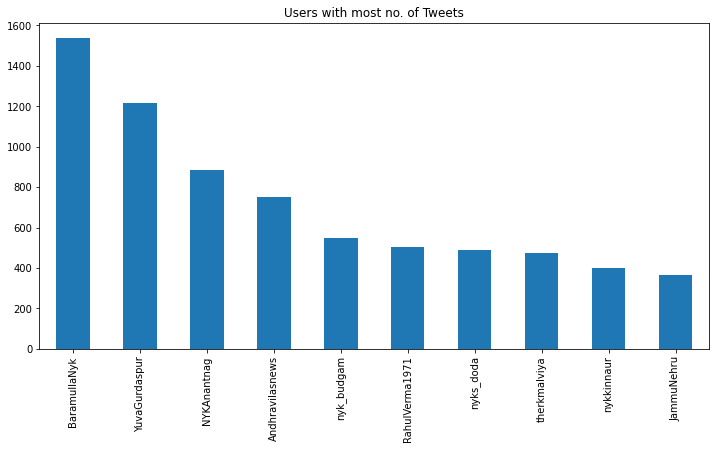

In [7]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()

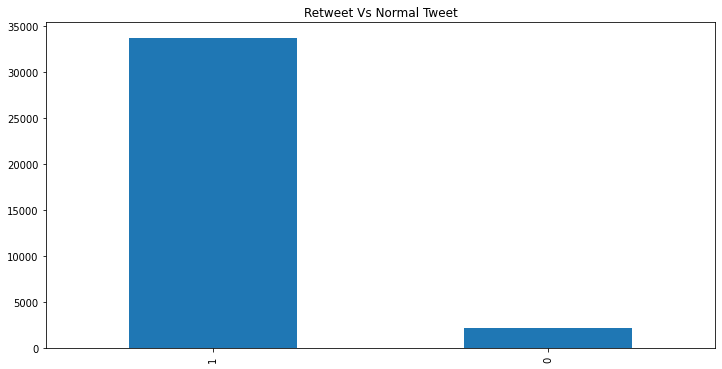

In [8]:
rtVsT=tweet_df["Retweet"].value_counts()
plt.figure(figsize=(12,6))
rtVsT.plot.bar();
plt.title("Retweet Vs Normal Tweet")
plt.show()

### Translating tweets

In [18]:
tweet_text=tweet_df['Tweet']
translated=[]

for i in range(10):
    if tweet_text[i]!=None:
        tempText=ts.google(tweet_text[i])
        translated.append(tempText)
    else:
        print(i)

In [19]:
translated

['@Vanchitruttank: #harghartiranga \n Ha national program naahi \n\n @Prksh_ambedkar \n #Prakashambedkar https://t.co/wcbrwqsowi',
 "@Abhishektibjp: #Harghartiranga .... Tricolor is our pride ... Let's join this Amrit Mahotsav of freedom and in our own home and in your house…",
 '@Abhishektibjp: #newprofilepic \n "The tricolor adds us, inspires us to do something for the country." \n From 13 to 15 August, you, your home…',
 '@Abhishektibjp: #newprofilepic \n "The tricolor adds us, inspires us to do something for the country." \n From 13 to 15 August, you, your home…',
 '@Abhishektibjp: The creator and freedom fighter of the national flag of India #Pingali_Nakaiya ji was born on 2 August 1876 in Milkipatnam.…',
 '@Abhishektibjp: #While participating in every_ghar_tiranga campaign, keep in mind that the tricolor is the identity of our country, for which millions of people sacrificed…',
 '@Abhishektibjp: This is the time, the right time, \n India has a precious time. \n Is the power of in